In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [80]:
df = pd.read_csv("weight_height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [81]:
df.info() # Information about the dataset and features used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


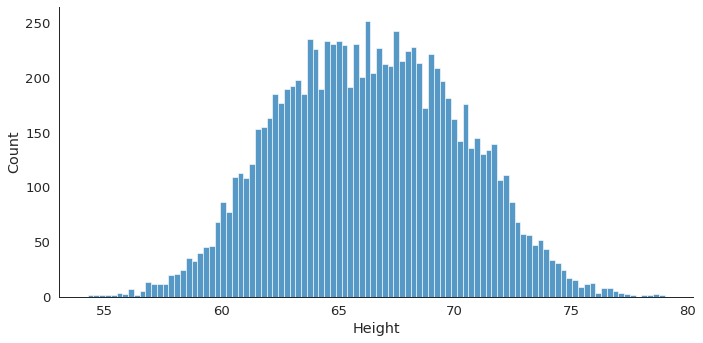

In [82]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.displot(data=df, x="Height", kind="hist", bins = 100, aspect = 2)

In [83]:
height = df["Height"].values # Pandas series to Numpy array

,sumsquare_error,aic,bic,kl_div
beta,0.003108,848.384299,-149805.573382,inf
lognorm,0.005284,803.863780,-144506.315623,inf
gamma,0.005296,803.860095,-144484.269318,inf
norm,0.005383,802.162043,-144330.934485,inf


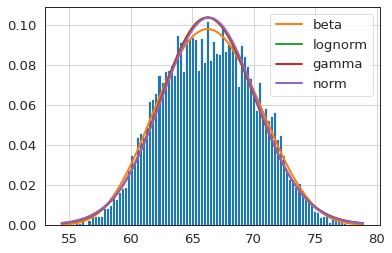

In [84]:
fitter = Fitter(height, distributions=['gamma', 'lognorm', "beta", "norm"])
fitter.fit()
fitter.summary()

In [85]:
fitter.get_best(method = 'sumsquare_error') # Best fit distribution ordered by sum square error feature

{'beta': {'a': 5.958319408062067,
  'b': 6.498169312519742,
  'loc': 52.87268950557022,
  'scale': 28.213574971918785}}

In [86]:
a, b, loc, scale = fitter.fitted_param["beta"] # Fitted parameters by the use of beta distribution

In [87]:
commonly_used_ones = get_common_distributions() # Some of commonly used distributions
print(commonly_used_ones)

['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']


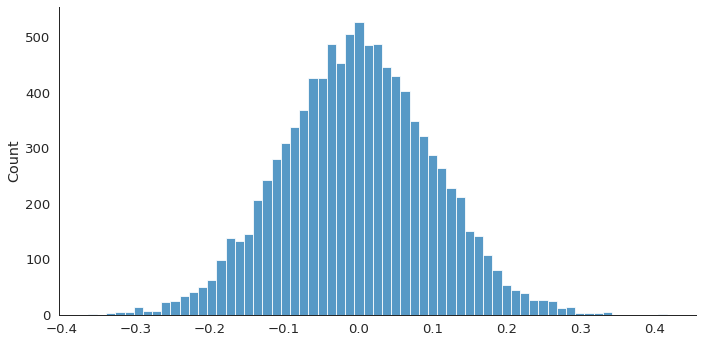

In [88]:
mu, sigma = 0, 0.1 # mean and standard deviation
normal = np.random.normal(mu, sigma, 10000) # Random normally distributed data

sns.displot(normal, aspect=2)

,sumsquare_error,aic,bic,kl_div
gamma,1.358467,244.251194,-89012.202944,inf
norm,1.359628,242.944910,-89012.868611,inf
lognorm,1.365334,242.429324,-88961.781158,inf
chi2,2.650448,233.012983,-82328.485749,inf
exponpow,17.585807,629.185524,-63404.850959,inf


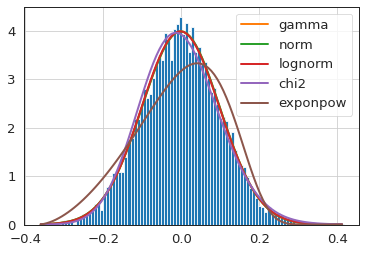

In [89]:
fitter = Fitter(normal, distributions= get_common_distributions())
fitter.fit()
fitter.summary()

In [90]:
fitter.get_best(method = 'sumsquare_error')

{'gamma': {'a': 97570.57896161423,
  'loc': -31.2477287219987,
  'scale': 0.00032024688403015897}}

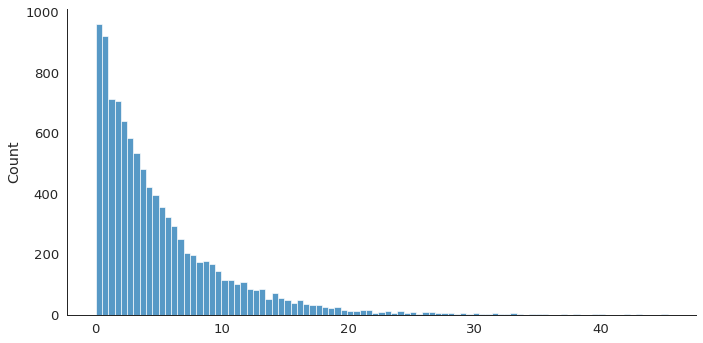

In [91]:
lambda_value = 5 # lambda value for exponential distribution formula
exponential = np.random.exponential(lambda_value, 10000) # Random exponentially distributed data

sns.displot(exponential, aspect=2)

,sumsquare_error,aic,bic,kl_div
gamma,0.000561,1232.058362,-166941.264841,inf
chi2,0.000561,1231.660541,-166925.287077,inf
expon,0.000578,1232.767593,-166639.101118,inf
exponpow,0.005728,1478.007810,-143700.303339,inf
lognorm,0.008935,1112.787924,-139253.561558,inf


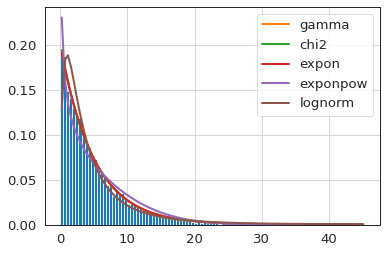

In [92]:
fitter = Fitter(exponential, distributions= get_common_distributions())
fitter.fit()
fitter.summary()

'''
Despite having an exponentially distributed data, we got gamma distribution as the best fit,
but that is fine because already gamma, chi2 and exponential distributions are very related
to each other and similar as visual in some cases.
'''

In [93]:
fitter.get_best(method = 'sumsquare_error')

{'gamma': {'a': 0.9903749011879586,
  'loc': 0.0007607939249632924,
  'scale': 5.037544198192684}}

In [95]:
get_distributions() # All of the supported distributions

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'pow